# load data

In [61]:
from datasets import load_dataset

hf_dataset = load_dataset("community-datasets/yahoo_answers_topics", split="train")
hf_dataset

Dataset({
    features: ['id', 'topic', 'question_title', 'question_content', 'best_answer'],
    num_rows: 1400000
})

In [62]:
hf_dataset[:5]

{'id': [0, 1, 2, 3, 4],
 'topic': [4, 5, 2, 6, 6],
 'question_title': ["why doesn't an optical mouse work on a glass table?",
  'What is the best off-road motorcycle trail ?',
  'What is Trans Fat? How to reduce that?',
  'How many planes Fedex has?',
  'In the san francisco bay area, does it make sense to rent or buy ?'],
 'question_content': ['or even on some surfaces?',
  'long-distance trail throughout CA',
  'I heard that tras fat is bad for the body.  Why is that? Where can we find it in our daily food?',
  'I heard that it is the largest airline in the world',
  'the prices of rent and the price of buying does not make sense to me, mostly the rent will not cover the mortgage . Is it better to rent a house or to buy?'],
 'best_answer': ['Optical mice use an LED and a camera to rapidly capture images of the surface beneath the mouse.  The infomation from the camera is analyzed by a DSP (Digital Signal Processor) and used to detect imperfections in the underlying surface and determ

## convert to pandas

In [63]:
df_pandas = hf_dataset.to_pandas()
df_pandas.head()

,id,topic,question_title,question_content,best_answer
0,0,4,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,1,5,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,2,2,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,3,6,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,4,6,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


## mapear classe

In [64]:
topic_labels = {
    0: "Society & Culture",
    1: "Science & Mathematics",
    2: "Health",
    3: "Education & Reference",
    4: "Computers & Internet",
    5: "Sports",
    6: "Business & Finance",
    7: "Entertainment & Music",
    8: "Family & Relationships",
    9: "Politics & Government"
}

In [65]:
df_pandas["topic_name"] = df_pandas["topic"].map(topic_labels)
df_pandas["topic_name"]

0          Computers & Internet
1                        Sports
2                        Health
3            Business & Finance
4            Business & Finance
                   ...         
1399995                  Health
1399996      Business & Finance
1399997                  Health
1399998       Society & Culture
1399999    Computers & Internet
Name: topic_name, Length: 1400000, dtype: object

## criar sample

In [66]:
df_copy = df_pandas.sample(n=500)
df_copy.shape

(500, 6)

In [67]:
df_copy.head()

,id,topic,question_title,question_content,best_answer,topic_name
1054851,1054851,7,Does anyone else thing Nicolas Cage is ugly?!?!?,,I used to think that. Now it just depends on t...,Entertainment & Music
671015,671015,0,Can you give me some good Islamc songs sides i...,,I listen to Dawud Wharnsby Ali but I picked up...,Society & Culture
70391,70391,8,Is all that men want from women is sex?,"I have grown up ""knowing"" that the only thing ...",No. If your talking about women in general. Ho...,Family & Relationships
406842,406842,9,"How did you vote for, George Bush, or John Sca...",Kerry is gay and Bush rockes. Let's Kill them...,"I voted for Bush, Kerry had no plan, like the ...",Politics & Government
5405,5405,6,How did Japan develop its intellectual propert...,,The USA - the USA provided 100% of Japan's sel...,Business & Finance


# Eda

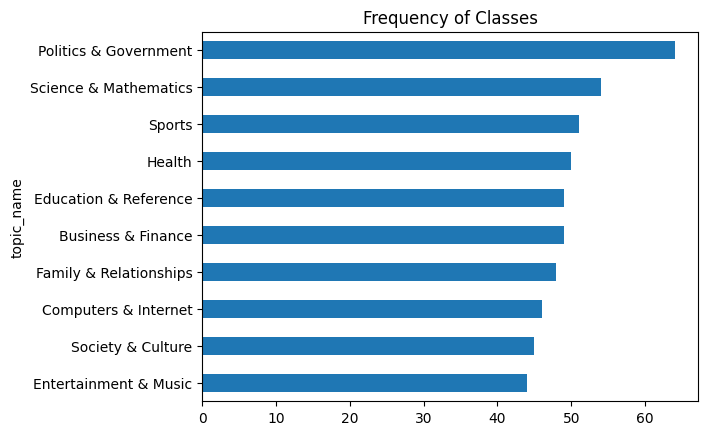

In [70]:
import matplotlib.pyplot as plt


df_copy["topic_name"].value_counts(ascending=True).plot.barh()

plt.title("Frequency of Classes")
plt.show()